In [16]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm
import os
import cv2

plt.style.use('dark_background')

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup

In [12]:
split = 'train/'
# split = 'test/'
datapath = f'/content/drive/MyDrive/PW/NN/Data/Alz_Full/'

In [9]:
scale = lambda a: np.interp(a, (a.min(), a.max()), (-1, +1))
norm_minmax = lambda img: scale(img*float(100)/img.mean())
norm_zscore = lambda img: (img - img.mean())/img.std()

In [10]:
mode = 'minmax'
# mode = 'zscore'

norm = norm_zscore if mode == 'zscore' else norm_minmax
mode

'minmax'

In [13]:
nondem_size = len(os.listdir(datapath+split+'NonDemented'))
dem_size = len(os.listdir(datapath+split+'Demented'))

print(nondem_size, dem_size)
NO = nondem_size + dem_size
NO

2560 2561


5121

# Dataframe (sized as the Resnet input)

In [17]:
df = np.zeros((NO, 3, 208, 176))
target = np.zeros(NO)
class_no = 0
i = 0
for folder in os.listdir(datapath+split):
    full_path = datapath+split+folder+'/'
    print(full_path)
    for fn in tqdm(os.listdir(full_path)):
        target[i] = class_no
        img = cv2.imread(full_path+fn, 0)
        img = norm(img)
        
        df[i,0,:,:] = img
        df[i,1,:,:] = img
        df[i,2,:,:] = img

        i += 1
    class_no += 1

df.shape

/content/drive/MyDrive/PW/NN/Data/Alz_Full/train/NonDemented/


100%|██████████| 2560/2560 [01:18<00:00, 32.48it/s]


/content/drive/MyDrive/PW/NN/Data/Alz_Full/train/Demented/


100%|██████████| 2561/2561 [01:23<00:00, 30.60it/s]


(5121, 3, 208, 176)

# Saving Data on Google Drive

In [18]:
# fn = datapath+f'{mode}_{split[:-1]}.npy'
# with open(fn, 'wb') as f:
#     np.save(f, df)
# fn

# PCA on flattened data

In [24]:
flat = df[:,0,:,:].reshape((5121, 208*176))

In [25]:
pca = PCA(2)
converted_data = pca.fit_transform(flat)
print(converted_data.shape)

(5121, 2)


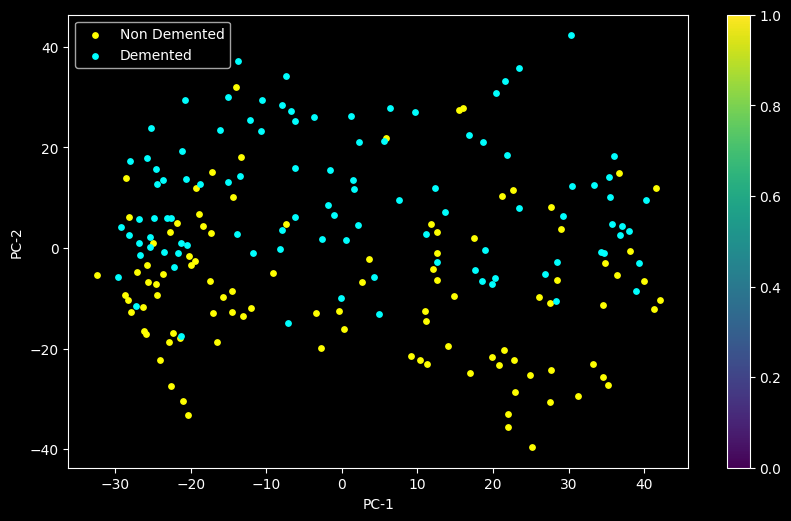

In [27]:
plt.figure(figsize = (10,6), dpi=100)
c_map = plt.cm.get_cmap('winter', 10)

nondem = converted_data[:nondem_size, :]
dem = converted_data[dem_size:, :]

np.random.shuffle(nondem)
np.random.shuffle(dem)

QTY = 100
plt.scatter(nondem[:QTY, 0], nondem[:QTY, 1], s = 15, cmap = c_map , c = 'yellow')
plt.scatter(dem[:QTY, 0], dem[:QTY, 1], s = 15, cmap = c_map , c = 'cyan')

plt.legend(['Non Demented', 'Demented' ])
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()